In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow  as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input

Init Plugin
Init Graph Optimizer
Init Kernel


In [3]:
(xTrain, _), (xTest, _) = mnist.load_data()

In [4]:
xTrain = xTrain.astype('float32') / 255.
xTest = xTest.astype('float32') / 255.

In [5]:
28 * 28

784

In [6]:
xTrain.shape, xTest.shape

((60000, 28, 28), (10000, 28, 28))

In [20]:
xTrain = xTrain.reshape((len(xTrain), np.prod((28, 28))))
xTest = xTest.reshape((len(xTest), np.prod((28, 28))))

In [8]:
xTrain.shape, xTest.shape

((60000, 784), (10000, 784))

In [12]:
input_l=Input(shape=(784,))
bottleneck=Dense(32, activation='relu')(input_l)
output_l=Dense(784, activation='sigmoid')(bottleneck)

autoencoder=Model(inputs=[input_l],outputs=[output_l])    ## Building the entire autoencoder
encoder=Model(inputs=[input_l],outputs=[bottleneck])    ## Building the encoder

encoded_input=Input(shape=(32,))

decoded=autoencoder.layers[-1](encoded_input)
decoder=Model(inputs=[encoded_input],outputs=[decoded])      ##Building the decoder

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(xTrain, xTrain,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(xTest, xTest))

2022-08-01 15:08:20.147179: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-08-01 15:08:20.147359: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/50


2022-08-01 15:08:20.360317: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - 2s 7ms/step - loss: 0.2756 - val_loss: 0.1890
Epoch 2/50
  9/235 [>.............................] - ETA: 1s - loss: 0.1904

2022-08-01 15:08:22.091793: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - 2s 6ms/step - loss: 0.1703 - val_loss: 0.1530
Epoch 3/50
235/235 [==============================] - 2s 6ms/step - loss: 0.1444 - val_loss: 0.1342
Epoch 4/50
235/235 [==============================] - 2s 6ms/step - loss: 0.1290 - val_loss: 0.1215
Epoch 5/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1185 - val_loss: 0.1129
Epoch 6/50
235/235 [==============================] - 2s 6ms/step - loss: 0.1113 - val_loss: 0.1073
Epoch 7/50
235/235 [==============================] - 2s 6ms/step - loss: 0.1064 - val_loss: 0.1030
Epoch 8/50
235/235 [==============================] - 2s 6ms/step - loss: 0.1027 - val_loss: 0.0998
Epoch 9/50
235/235 [==============================] - 2s 6ms/step - loss: 0.0999 - val_loss: 0.0974
Epoch 10/50
235/235 [==============================] - 2s 6ms/step - loss: 0.0978 - val_loss: 0.0957
Epoch 11/50
235/235 [==============================] - 2s 6ms/step - loss: 0.0964 - val_loss: 0.0947
Epoch 12/

In [16]:
from numpy import reshape

encoded_images = encoder.predict(xTest)
decoded_images = decoder.predict(encoded_images)
pred_images = reshape(decoded_images, newshape=(decoded_images.shape[0], 28, 28)) 

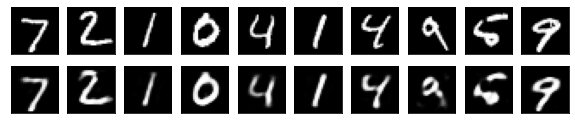

In [18]:
n = 10
plt.figure(figsize=(10, 2))
for i in range(n): 
    ax = plt.subplot(2, n, i + 1)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(xTest[i].reshape(28, 28))
    plt.gray()
 
    ax = plt.subplot(2, n, i + 1 + n)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(pred_images[i].reshape(28, 28))